In [1]:
import pandas as pd

# Path to your dataset
file_path = "training.1600000.processed.noemoticon.csv"

# Load the dataset
columns = ["target", "id", "date", "flag", "user", "text"]
data = pd.read_csv(file_path, encoding="latin-1", names=columns)

# Preview the first 5 rows
print(data.head())


   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [2]:
# the colums i want at the moment
data = data[["target", "text"]]

# Rename target labels for readability
data["sentiment"] = data["target"].map({0: "negative", 2: "neutral", 4: "positive"})

# Drop the old target column
data = data.drop(columns=["target"])

# Preview the cleaned data
print(data.head())


                                                text sentiment
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  negative
1  is upset that he can't update his Facebook by ...  negative
2  @Kenichan I dived many times for the ball. Man...  negative
3    my whole body feels itchy and like its on fire   negative
4  @nationwideclass no, it's not behaving at all....  negative


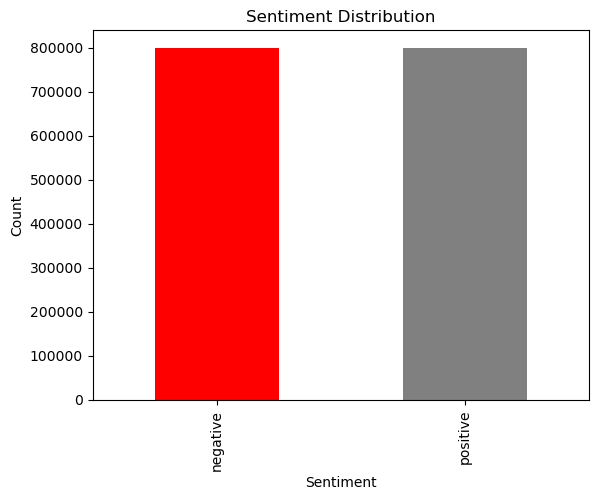

In [3]:
# visulzation of my data
import matplotlib.pyplot as plt

# Count the sentiments
sentiment_counts = data["sentiment"].value_counts()

# Plot the distribution
sentiment_counts.plot(kind="bar", color=["red", "gray", "green"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [11]:
#i create a data quality report because you said in class that it a good way to visulize data
import pandas as pd

# Load your dataset
file_path = "training.1600000.processed.noemoticon.csv"
columns = ["target", "id", "date", "flag", "user", "text"]
data = pd.read_csv(file_path, encoding="latin-1", names=columns)

# Function to generate a data quality report
def generate_data_quality_report(df):
    report = pd.DataFrame({
        "Column Name": df.columns,
        "Data Type": df.dtypes.values,
        "Non-Null Count": df.notnull().sum().values,
        "Null Count": df.isnull().sum().values,
        "Unique Values Count": df.nunique().values,
        "Sample Value": [df[col].dropna().iloc[0] if df[col].notnull().any() else None for col in df.columns],
    })
    
    # Add descriptive statistics for numeric columns
    numeric_stats = df.describe().T[["mean", "std", "min", "max"]]
    report = report.merge(numeric_stats, left_on="Column Name", right_index=True, how="left")
    
    return report

# Generate and display the report
data_quality_report = generate_data_quality_report(data)
print(data_quality_report)




  Column Name Data Type  Non-Null Count  Null Count  Unique Values Count  \
0  target       int64    1600000         0                 2               
1      id       int64    1600000         0           1598315               
2    date      object    1600000         0            774363               
3    flag      object    1600000         0                 1               
4    user      object    1600000         0            659775               
5    text      object    1600000         0           1581466               

  Sample Value                                        mean          \
0                                                  0  2.000000e+00   
1                                         1467810369  1.998818e+09   
2                       Mon Apr 06 22:19:45 PDT 2009           NaN   
3                                           NO_QUERY           NaN   
4                                    _TheSpecialOne_           NaN   
5  @switchfoot http://twitpic.com/2y1zl - Awww,